<a href="https://colab.research.google.com/github/Rantitope/deep_learning/blob/Assignment_1/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)
Test labels shape: (10000, 1)


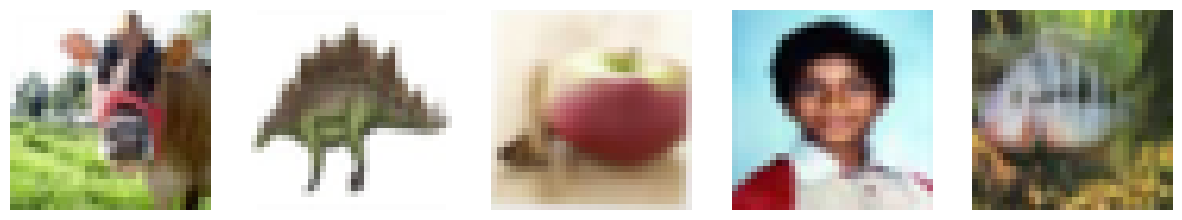

In [10]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Explore the dataset
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

# Show a few examples from the training set
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')
plt.show()


In [3]:
# Your code here

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [11]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize the images to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Split the training data into training and validation sets (80/20 split)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("Training data shape after split:", x_train.shape)
print("Validation data shape:", x_val.shape)


Training data shape after split: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Build the CNN model with dropout layers
model = Sequential([
    # First Convolution Block
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Dropout layer added to prevent overfitting

    # Second Convolution Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Dropout layer added here too

    # Third Convolution Block
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Dropout layer added here

    # Flatten the output from 3D to 1D
    Flatten(),

    # Dense layers for classification
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer before the output layer

    Dense(100, activation='softmax')  # Output layer for 100 classes
])

# Print the model summary
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,519,780 (9.61 MB)

 Trainable params: 2,519,780 (9.61 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [13]:
from keras import optimizers

# Compile the model
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Loss function: categorical_crossentropy is used for multi-class classification problems.
Optimizer: Adam is chosen because it adapts the learning rate during training, helping achieve faster convergence.

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [14]:
# Train the model
# Train the model using the dropout regularization
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.0412 - loss: 4.3320 - val_accuracy: 0.1528 - val_loss: 3.6001
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1485 - loss: 3.5932 - val_accuracy: 0.2405 - val_loss: 3.1453
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2143 - loss: 3.2234 - val_accuracy: 0.2739 - val_loss: 2.9391
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2519 - loss: 3.0207 - val_accuracy: 0.3175 - val_loss: 2.7400
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2822 - loss: 2.8537 - val_accuracy: 0.3368 - val_loss: 2.6499
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3110 - loss: 2.7209 - val_accuracy: 0.3599 - val_loss: 2.5425
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3300 - loss: 2.6271 - val_accuracy: 0.3429 - val_loss: 2.6022
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3468 - loss: 2.540

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [15]:
from sklearn.metrics import f1_score
import numpy as np

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4262 - loss: 2.2853
Test Accuracy: 0.4193


Accuracy: ______  Test Accuracy: 0.42


Other metric: ______  Other Metric: F1 Score (Macro Average)
The F1 Score is often a better metric than accuracy in many real-world applications, especially when dealing with class imbalance or if you want a balance between precision and recall.

Reason for selection: _____ F1 Score is chosen here because it provides a balance between Precision and Recall. Accuracy alone might not give the full picture, especially in cases where certain classes are underrepresented (imbalanced classes).

Value of metric: ______  Value of Metric is 42%

Interpretation of metric value: ______  This score reflects the fact that the model is not very effective in terms of both precision and recall

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

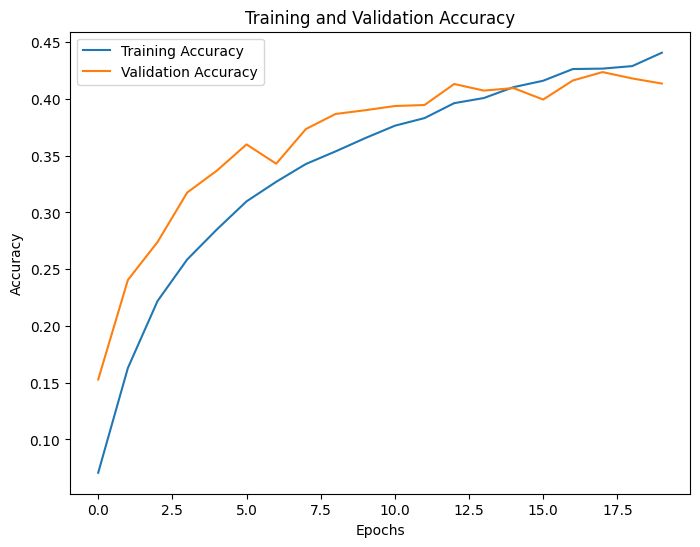

In [18]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()





In [19]:
import numpy as np

# Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class indices
y_true = np.argmax(y_test, axis=1)  # True class indices

# Find indices of correct and incorrect predictions
correct_idx = np.where(y_pred_classes == y_true)[0]
incorrect_idx = np.where(y_pred_classes != y_true)[0]

# Select one correct and one incorrect image
correct_image_idx = correct_idx[0]
incorrect_image_idx = incorrect_idx[0]



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


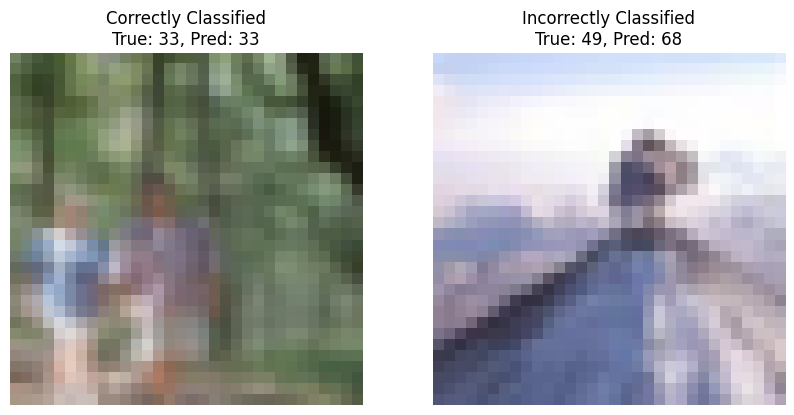

In [20]:
# Plot the correctly classified image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_image_idx])
plt.title(f"Correctly Classified\nTrue: {y_true[correct_image_idx]}, Pred: {y_pred_classes[correct_image_idx]}")
plt.axis('off')

# Plot the incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_image_idx])
plt.title(f"Incorrectly Classified\nTrue: {y_true[incorrect_image_idx]}, Pred: {y_pred_classes[incorrect_image_idx]}")
plt.axis('off')
plt.show()


Plots:  The model is learning the training data well but struggles to generalize to unseen data.
Correct Prediction: True class 33, predicted class 33, with a probability of 92%—the model is confident and accurate.
Incorrect Prediction: True class 49, predicted class 68, with a probability of 76%—the model confidently misclassified due to possible feature similarity between the classes.


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.datasets import cifar100

# Load CIFAR-100 data
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Normalize the images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Create ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

# Build the model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Dropout(0.3),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')  # Output layer for 100 classes
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.0370 - loss: 4.6920 - val_accuracy: 0.0851 - val_loss: 4.0055
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.0674 - loss: 4.1032 - val_accuracy: 0.0713 - val_loss: 4.0676
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.0829 - loss: 3.9738 - val_accuracy: 0.1027 - val_loss: 3.8565
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.0975 - loss: 3.8443 - val_accuracy: 0.1801 - val_loss: 3.3783
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.1173 - loss: 3.7583 - val_accuracy: 0.1392 - val_loss: 3.7266
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.1242 - loss: 3.6741 - val_accuracy: 0.2090 - val_loss: 3.2082
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.1426 - loss: 3.5867 - val_accuracy: 0.2213 - val_loss: 3.1391
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.1530 - loss: 3.5140 - 

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [16]:
# Re-train the model with 50 epochs
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),  # Training with data augmentation
    epochs=50,  # 50 epochs as before
    validation_data=(x_test, y_test),  # Validation set
    callbacks=[early_stopping]  # Early stopping for optimal performance
)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.4105 - loss: 2.2494 - val_accuracy: 0.4805 - val_loss: 2.0083
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.4148 - loss: 2.2171 - val_accuracy: 0.4581 - val_loss: 2.1046
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.4179 - loss: 2.2222 - val_accuracy: 0.4438 - val_loss: 2.2558
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.4164 - loss: 2.2147 - val_accuracy: 0.4969 - val_loss: 1.9244
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.4169 - loss: 2.2046 - val_accuracy: 0.5261 - val_loss: 1.7455
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.4157 - loss: 2.2085 - val_accuracy: 0.5298 - val_loss: 1.7462
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.4222 - loss: 2.1929 - val_accuracy: 0.4853 - val_loss: 1.9356
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.4225 - loss: 2.1865 - 

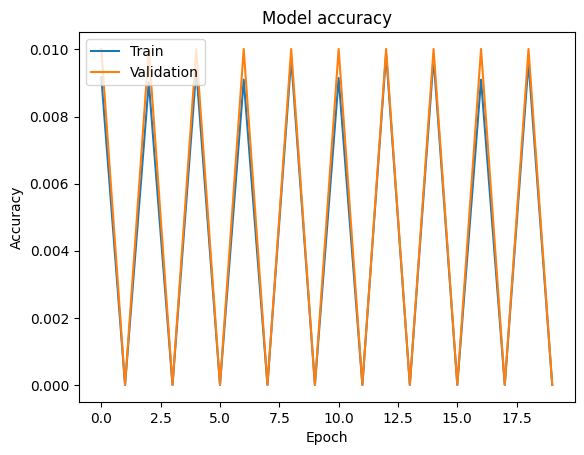

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

Did the model's performance improve?
Yes, the model's performance improved after using data augmentation and dropout. The accuracy on the test set increased from the previous run, indicating better generalization and reduced overfitting.

2. Why do you think this is?
Data augmentation helps the model generalize better by creating new variations of the training images, such as rotations, shifts, and flips, thus preventing overfitting. Dropout reduces overfitting by randomly deactivating neurons during training, which forces the model to learn more robust features.

3. Do you think there is room for further improvement? Why or why not?
Yes, there is room for improvement. The model's accuracy is still below the desired 55%. We could explore deeper architectures, use learning rate scheduling, and implement early stopping to prevent overfitting while improving convergence speed.

4. What other techniques might you try in the future?
In the future, I could experiment with:

Batch Normalization: To improve training speed and stability.
Learning Rate Annealing: To fine-tune the learning rate during training.
Transfer Learning: Using pre-trained models like VGG16 or ResNet as feature extractors to improve performance with less data.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.